# Notebook 1 - The quantum harmonic oscillator:
-------------

# A. 1.1 (Strategy 1):
-------------
To find the coefficients $ c_1 $, $ c_2 $, $ c_3 $, and $ c_4 $, we'll start by expressing $ \hat{\tilde{H}}_{\mathrm{ho}} $ in terms of the matrix representation:

$$
\hat{\tilde{H}}_{\mathrm{ho}} = \begin{pmatrix} \hat{a}^{\dagger} & \hat{a} \end{pmatrix} \begin{pmatrix} c_1 & c_2 \\ c_3 & c_4 \end{pmatrix} \begin{pmatrix} \hat{a} \\ \hat{a}^{\dagger} \end{pmatrix}.
$$

Expanding this expression, we get:

$$
\begin{pmatrix} \hat{a}^{\dagger} & \hat{a} \end{pmatrix} \begin{pmatrix} c_1 & c_2 \\ c_3 & c_4 \end{pmatrix} \begin{pmatrix} \hat{a} \\ \hat{a}^{\dagger} \end{pmatrix} = c_1 \hat{a}^{\dagger} \hat{a} + c_2 \hat{a}^{\dagger 2} + c_3 \hat{a}^2 + c_4 \hat{a} \hat{a}^{\dagger}.
$$

We then follow the steps below:

1. We compare this expression with the original Hamiltonian to find the coefficients $ c_1 $, $ c_2 $, $ c_3 $, and $ c_4 $.

    $$ 
    c_1 = \frac{\hbar}{2}\left(\omega + \frac{\omega_{\mathrm{d}}^2}{2 \omega}\right), \quad 
    c_2 = \hbar\frac{\omega_{\mathrm{d}}^2}{4 \omega} , \quad
    c_3 = \hbar\frac{\omega_{\mathrm{d}}^2}{4 \omega} , \quad
    c_4 = \frac{\hbar}{2}\left(\omega + \frac{\omega_{\mathrm{d}}^2}{2 \omega}\right).
    $$

2. For later convenience we introduce a new frequency defined as:

    $$ \tilde{\omega}^2 =  \omega^2 + \omega_{\textrm{d}}^2. $$

    The coefficients can be rewritten accordingly as:
    $$ 
    c_1 = \frac{\hbar}{4 \omega}\left(\omega^2 + \tilde{\omega}^2\right), \quad 
    c_2 = \frac{\hbar}{4 \omega}\left(\tilde{\omega}^2 - \omega^2 \right) , \quad
    c_3 = \frac{\hbar}{4 \omega}\left(\tilde{\omega}^2  - \omega^2 \right) , \quad
    c_4 = \frac{\hbar}{4 \omega}\left(\omega^2 + \tilde{\omega}^2\right).
    $$

3. Now the next step is to define the new operators in terms of the old ones as:

    $$
    \begin{pmatrix} \hat{b} \\ \hat{b}^{\dagger} \end{pmatrix} = U \begin{pmatrix} \hat{a} \\ \hat{a}^{\dagger} \end{pmatrix},  \qquad \begin{pmatrix} \hat{b}^{\dagger} & \hat{b} \end{pmatrix} =  \begin{pmatrix} \hat{a}^{\dagger} & \hat{a}\end{pmatrix} U^{\dagger} 
    $$

    Because $\hat{b}$ and $\hat{b}^{\dagger}$ have to satisfy bosonic commutation relations, i.e. $[\hat{b},\hat{b}^{\dagger}]=1$, and they have to be the adjoint of each other, it means that $U$ can be written as 
    $$ U = \begin{pmatrix} u & v \\ v^* & u^* \end{pmatrix},$$ 
    with $|u|^2-|v|^2 = 1$. This implies that the following matrix relation should be satisfied:

    $$ U \sigma_z U^{\dagger} = \sigma_z \quad\rightarrow U^{\dagger} = \sigma_z U^{-1}\sigma_z$$

    with $\sigma_z = \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix},$ the z-Pauli matrix. 

4. The newly transformed Hamiltonian can then be written as:

    $$
    \begin{split}
    \hat{\tilde{H}}_{\mathrm{ho}} &= \begin{pmatrix} \hat{b}^{\dagger} & \hat{b} \end{pmatrix} \left(U^{\dagger}\right)^{-1}\begin{pmatrix} c_1 & c_2 \\ c_3 & c_4 \end{pmatrix} U^{-1} \begin{pmatrix} \hat{b} \\ \hat{b}^{\dagger} \end{pmatrix} \\
    &=\begin{pmatrix} \hat{b}^{\dagger} & \hat{b} \end{pmatrix} \left(\sigma_z U^{-1}\sigma_z\right)^{-1}\begin{pmatrix} c_1 & c_2 \\ c_3 & c_4 \end{pmatrix} U^{-1} \begin{pmatrix} \hat{b} \\ \hat{b}^{\dagger} \end{pmatrix} \\
    &=  \begin{pmatrix} \hat{b}^{\dagger} & \hat{b} \end{pmatrix} \sigma_z U \sigma_z \begin{pmatrix} c_1 & c_2 \\ c_3 & c_4 \end{pmatrix} U^{-1} \begin{pmatrix} \hat{b} \\ \hat{b}^{\dagger} \end{pmatrix}
    \end{split}
    $$

5. In order to get a diagonal representation in $\hat{b}$ and $\hat{b}^{\dagger}$, we then need to diagonalize $\sigma_z\begin{pmatrix} c_1 & c_2 \\ c_3 & c_4 \end{pmatrix}$. We can do so using sympy:

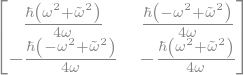

Diagonalized Matrix:


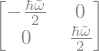

Diagonal Transformation Matrix


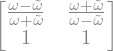

In [1]:
import numpy as np
import sympy as sp

# Enable LaTeX printing
sp.init_printing()

# Define symbolic variables
omega, omega_t = sp.symbols('omega omegatilde')
hbar = sp.symbols('hbar', real=True, positive=True)  # hbar is real and positive

# Define the coefficients symbolically
c1 = hbar / (4 * omega) * (omega**2 + omega_t**2)
c2 = hbar / (4 * omega) * (omega_t**2 - omega**2)
c3 = hbar / (4 * omega) * (omega_t**2 - omega**2)
c4 = hbar / (4 * omega) * (omega**2 + omega_t**2)

# Define the coefficient matrix and sigma_z
A = sp.Matrix([[c1, c2],
               [c3, c4]])
sz = sp.Matrix([[1, 0],
               [0, -1]])

# Get the matrix to be diagonalized
At = sz.multiply(A)
display(At)

# Compute diagonalized matrix and transformation matrix symbolically
U, D = At.diagonalize()

print('Diagonalized Matrix:')
display(D)

print('Diagonal Transformation Matrix')
display(U)


6. In the diagonalized matrix $D$ above the order of the eigenvalues is arbitrary, but since with the given commutation relations the diagonal representation of the Hamiltonian in the new basis has to be

    $$
    \hat{H}_{\textrm{ho}} = (\hat{b}^{\dagger} \; \hat{b}) \begin{pmatrix} \frac{\hbar \tilde{\omega}}{2} & 0 \\ 0 & \frac{\hbar \tilde{\omega}}{2} \end{pmatrix} \begin{pmatrix} \hat{b}  \\  \hat{b}^{\dagger} \end{pmatrix} =  (\hat{b}^{\dagger} \; \hat{b}) \sigma_z D \begin{pmatrix} \hat{b}  \\  \hat{b}^{\dagger} \end{pmatrix}
    $$

    then we should swap the eigenvalues and hence eigenvectors. At the same time, since we can always multiply the eigenvectors by a constant we can do so as below which will help with eventually getting to the desired shape introduced for $U$



Swapped and rescaled Transformation Matrix


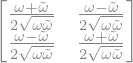

Verification of the diagonalization


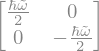

In [2]:
U_s = sp.Matrix([[U[0, 1],U[0, 0]],
                 [U[1, 1],U[1, 0]]])

U_s[:,0] =  (omega-omega_t)/sp.sqrt(4*omega*omega_t)*U_s[:,0]
U_s[:,1] =  (omega+omega_t)/sp.sqrt(4*omega*omega_t)*U_s[:,1]

print('Swapped and rescaled Transformation Matrix')
display(U_s)
print('Verification of the diagonalization')
display(sp.simplify(U_s.inv().multiply(At.multiply(U_s))))

7. Finally we shall remember that the matrix the diagonalizes $\sigma_z\begin{pmatrix} c_1 & c_2 \\ c_3 & c_4 \end{pmatrix}$ is the inverse of the basis transformation defined in the question. Hence before proceeding we should invert the transformation above

U inverse


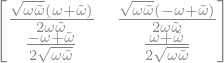

In [3]:
print('U inverse')
U_s_inv = U_s.inv()
display(sp.simplify(U_s_inv))

8. Finally from the rows (as defined in the original transformation) we can read off the transfomation between the new and old operators:

    $$
    \hat{b} = \sqrt{\frac{1}{4 \omega \tilde{\omega}}}\left[\hat{a} \left(\tilde{\omega} + \omega \right) + \hat{a}^{\dagger}\left(\tilde{\omega} - \omega \right)  \right].
    $$  
    Note how the factor $1/\sqrt{4 \omega \tilde{\omega}}$ was introduced so that the commutation properties are preserved in the transformation as explained in the question

# A. 1.1 (Strategy 2):
-------------
We can then define

$$
\hat{b} = \sqrt{\frac{1}{4 \omega \tilde{\omega}}}\left[\omega \left(\hat{a} - \hat{a}^{\dagger}\right) + \tilde{\omega}\left(\hat{a} + \hat{a}^{\dagger} \right)  \right] = \sqrt{\frac{1}{4 \omega \tilde{\omega}}}\left[\hat{a} \left(\tilde{\omega} + \omega \right) + \hat{a}^{\dagger}\left(\tilde{\omega} - \omega \right)  \right],
$$

$$
\hat{b}^{\dagger} = \sqrt{\frac{1}{4 \omega \tilde{\omega}}}\left[\hat{a}^{\dagger} \left(\tilde{\omega} + \omega \right) + \hat{a}\left(\tilde{\omega} - \omega \right)  \right],
$$

with

$$
\tilde{\omega} = \sqrt{\omega^2 + \omega_{\mathrm{d}}^2}.
$$

They obey $[\hat{b}, \hat{b}^{\dagger}] =1$, and we have

$$
\hat{\tilde{H}}_{\mathrm{ho}} = \sum_{\tilde{n}=0}^{\infty} \hbar \tilde{\omega}\left(\tilde{n} + \frac{1}{2} \right)\ket{\tilde{n}}\bra{\tilde{n}}.
$$

# A. 1.2:
-------------
We can define

$$
\hat{c} = \hat{b} - \frac{\hbar^{3/2}k_l \omega_{\text{d}}}{\sqrt{2 \hbar^2 m \tilde{\omega}^3 }} \quad \text{and} \quad \hat{c}^{\dagger} = \hat{b}^{\dagger} - \frac{\hbar^{3/2}k_l \omega_{\text{d}}}{\sqrt{2 \hbar^2 m \tilde{\omega}^3 }},
$$

and find

$$
\hat{\tilde{H}}_{\mathrm{ho}}' = \hbar \tilde{\omega} \left(\hat{c}^{\dagger} \hat{c} + \frac{1}{2}\right) -\frac{\hbar^2k_l^2 \omega_{\text{d}}^2}{2 m \tilde{\omega}^2} = \sum_{\tilde{m}=0}^{\infty} \hbar \tilde{\omega} \;\left(\tilde{m} + \frac{1}{2}\right)\ket{\tilde{m}}\bra{\tilde{m}} -\frac{\hbar^2k_l^2 \omega_{\text{d}}^2}{2 m \tilde{\omega}^2}.
$$

## A. 1.3
---

This are the solutions:

1. For $n=0$ the original quantum harmonic oscillator we have

    $$
    \langle n=0|\hat{E}|n=0\rangle = 0
    $$

    $$
    \sqrt{\langle n=0|\hat{E^2}|n=0\rangle-\langle n=0|\hat{E}|n=0\rangle^2} =\sqrt{\langle n=0|\hat{E^2}|n=0\rangle}=\sqrt{\left(\frac{i}{\sqrt{2}}\sqrt{\frac{\hbar \omega}{\epsilon_0 L^3}}\right)^2\langle n=0|(\hat{a} - \hat{a}^{\dagger})^2|n=0\rangle} = \sqrt{\left(\frac{i}{\sqrt{2}}\sqrt{\frac{\hbar \omega}{\epsilon_0 L^3}}\right)^2(-1)} = \frac{1}{\sqrt{2}}\sqrt{\frac{\hbar \omega}{\epsilon_0 L^3}}
    $$

2. For the diamagnetic oscillator with $\tilde{n} = 0$ we note that

    $$
    (\hat{a} - \hat{a}^{\dagger}) = \sqrt{\frac{\tilde{\omega}}{\omega}}(\hat{b} - \hat{b}^{\dagger}),
    $$

    hence

    $$
    \langle \tilde{n}=0|\hat{E}|\tilde{n}=0\rangle = 0,
    $$

    $$
    \sqrt{\langle \tilde{n}=0|\hat{E^2}|\tilde{n}=0\rangle-\langle \tilde{n}=0|\hat{E}|\tilde{n}=0\rangle^2} =\sqrt{\langle \tilde{n}=0|\hat{E^2}|\tilde{n}=0\rangle} = \frac{1}{\sqrt{2}}\sqrt{\frac{\hbar \tilde{\omega}}{\epsilon_0 L^3}}.
    $$

    Note that the bigger the diamagnetic frequency $\omega_{\text{d}}$, the bigger the fluctuations!

3. For the shifted oscillator from Q. 1.2 with $\tilde{m}=0$ we instead see that

    $$
    (\hat{b} - \hat{b}^{\dagger}) = (\hat{c} - \hat{c}^{\dagger}),
    $$

    hence everything is like in 2. Note that for the magnetic field $\propto \hat{a} + \hat{a}^{\dagger}$ instead this is not true, because the constant real shift will not cancel! 